![YouTubeNews](Images/youtube_news.png)

<h1><center>Social Media Bonanza: YouTube vs News</center></h1>
<h4><center>Authors: Blake Freeman, Jill Smith, Tomeka Morrison, Trong Nguyen</center></h4>
<p>What is the relationship between news and social media? In this project will we analyze news articles and YouTube posts to determine what articles stand out.</p>

In [18]:
%matplotlib notebook
import pandas as pd 
import numpy as np 
import pymongo
import datetime as dt
import matplotlib.pyplot as plt

<h3>Import Clean Data & Create DataFrames</h3>

In [2]:
# Load YouTube data (clean) and Articles data (clean)
youtube_csv = ('Resources/YouTube_Clean.csv')
articles_csv = ('Resources/Articles_Clean_v2.csv')

In [3]:
# Convert YouTube Data into DataFrame 
youtube_df = pd.read_csv(youtube_csv)
youtube_df.head()

,Category_ID,Category,Date,Video_Title,Channel,Tags,Total_Views,Total_Likes,Comments_Count
0,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954
1,22,People & Blogs,2017-11-14,Me-O Cats Commercial,Nobrand,"cute|""cats""|""thai""|""eggs""",98966,2486,532
2,22,People & Blogs,2017-11-14,"AFFAIRS, EX BOYFRIENDS, $18MILLION NET WORTH -...",Shawn Johnson East,"shawn johnson|""andrew east""|""shawn east""|""shaw...",321053,4451,895
3,22,People & Blogs,2017-11-14,BLIND(folded) CAKE DECORATING CONTEST (with Mo...,Grace Helbig,"itsgrace|""funny""|""comedy""|""vlog""|""grace""|""helb...",197062,7250,456
4,22,People & Blogs,2017-11-14,Wearing Online Dollar Store Makeup For A Week,Safiya Nygaard,wearing online dollar store makeup for a week|...,2744430,115426,6541


In [4]:
yt_group = youtube_df.groupby('Category')
count_yt= yt_group['Category'].count()

count_yt

Category
 Autos & Vehicles          384
 Comedy                   3457
 Education                1656
 Entertainment            9964
 Film & Animation         2345
 Gaming                    817
 Howto & Style            4146
 Music                    6472
 News & Politics          2487
 Nonprofits & Activism      57
 People & Blogs           3210
 Pets & Animals            920
 Science & Technology     2401
 Shows                      57
 Sports                   2174
 Travel & Events           402
Name: Category, dtype: int64

<IPython.core.display.Javascript object>


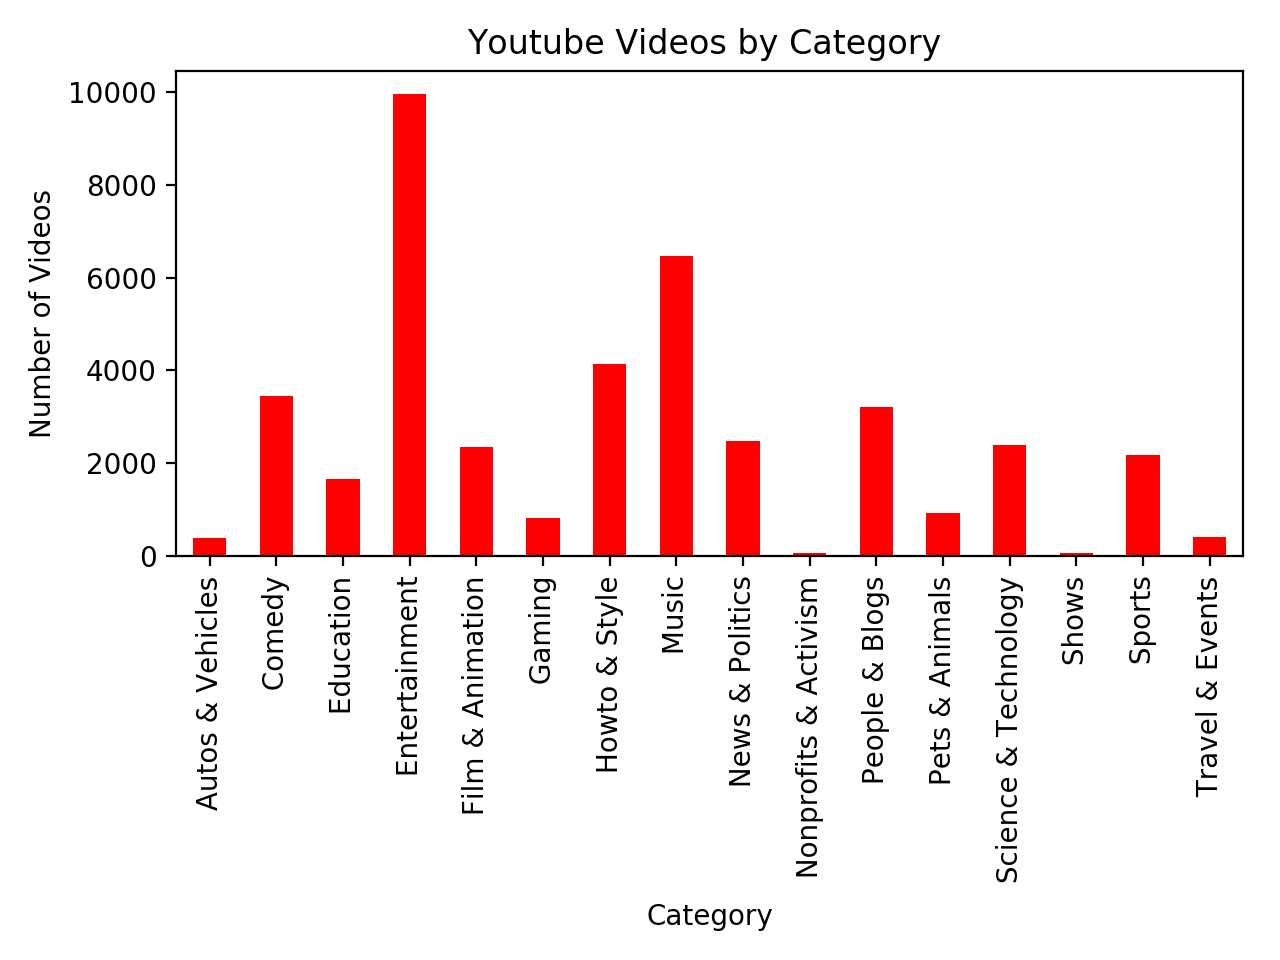

In [27]:
yt_chart = count_yt .plot(kind='bar', color='r')


yt_chart.set_xlabel("Category")
yt_chart.set_ylabel("Number of Videos")
plt.title('Youtube Videos by Category ')

plt.show()
plt.tight_layout()
plt.savefig('YTbar.png')

<IPython.core.display.Javascript object>


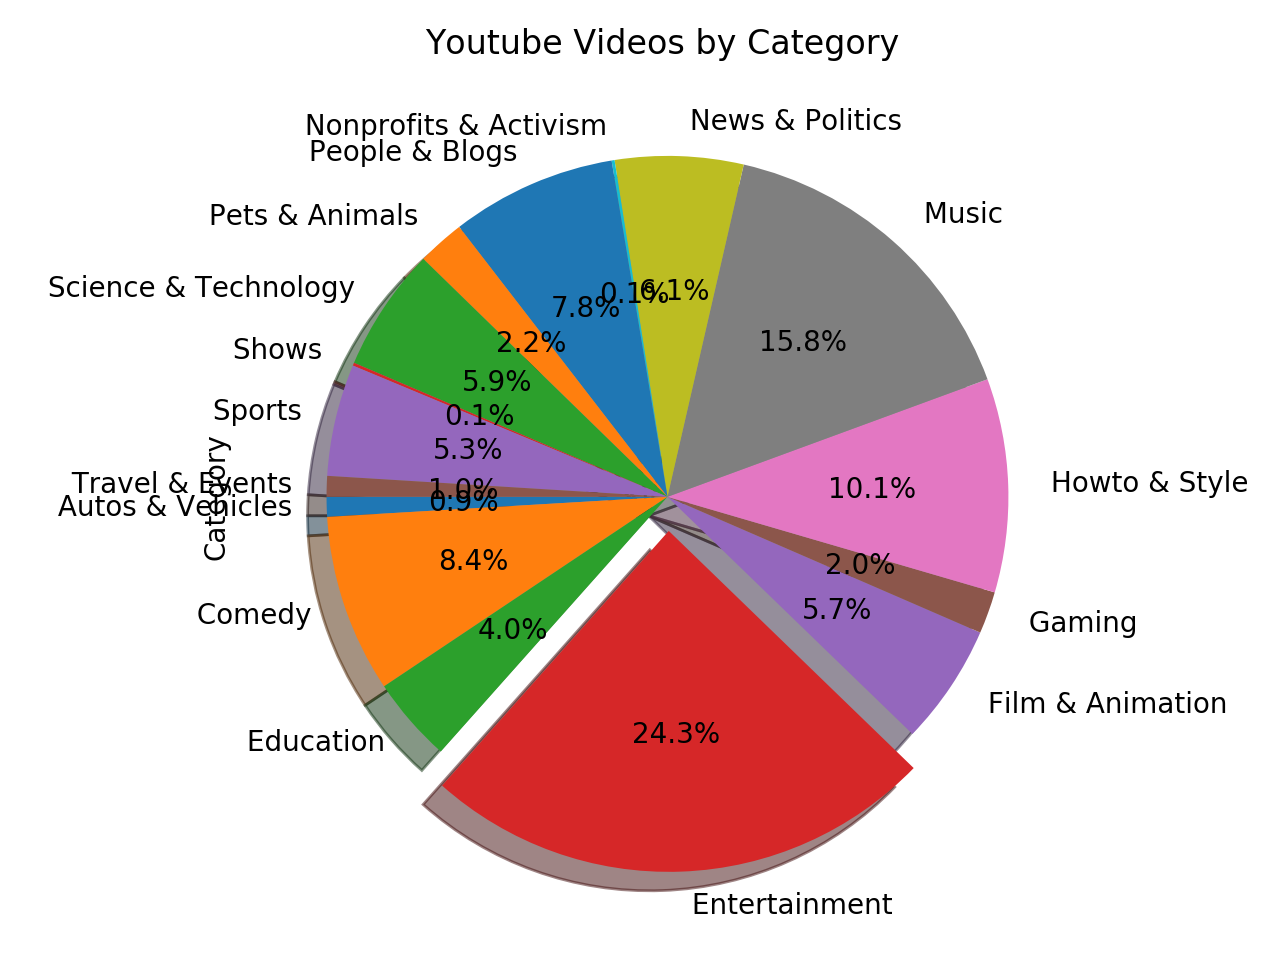

In [57]:
explode = (0,0,0,0.1,0,0,0,0,0,0,0,0,0,0,0,0)
yt_pie= count_yt .plot(kind='pie', explode=explode,autopct="%1.1f%%", shadow=True, startangle=180)


plt.title('Youtube Videos by Category ')
plt.show()
plt.tight_layout()
plt.savefig('YTPie.png')

In [7]:
# Convert Articles Data into DataFrame 
articles_df = pd.read_csv(articles_csv)
articles_df.head()

,Article_ID,Headline,Keywords,News_Category,Pub_Date,Section_Name,Snippet,Media_Type,URL
0,5a7101c110f40f00018be961,"Rhythm of the Streets: ‘We’re Warrior Women, a...","['Bahia (Brazil)', 'Music', 'Women and Girls',...",Travel & Events,1/30/2018 23:37,Unknown,Meet the all-female Brazilian drum group that ...,News,https://www.nytimes.com/2018/01/30/travel/braz...
1,5a70fc1210f40f00018be950,"As Deficit Grows, Congress Keeps Spending","['United States Politics and Government', 'Fed...",News & Politics,1/30/2018 23:13,Politics,Treasury Secretary Steven Mnuchin urged Congre...,News,https://www.nytimes.com/2018/01/30/us/politics...
2,5a70f8f810f40f00018be943,Lesson in Select Bus Service,"['Buses', 'Pennsylvania Station (Manhattan, NY...",News & Politics,1/30/2018 23:00,Unknown,A woman finds out what happens when you don’t ...,News,https://www.nytimes.com/2018/01/30/nyregion/me...
3,5a70eb8110f40f00018be925,Here’s the Real State of the Union,"['State of the Union Message (US)', 'Trump, Do...",People & Blogs,1/30/2018 22:02,Editorials,The reaction against his authoritarian impulse...,Editorial,https://www.nytimes.com/2018/01/30/opinion/edi...
4,5a70d1d210f40f00018be8d9,Good Riddance to Chief Wahoo,"['Baseball', 'Cleveland Indians', 'Western Res...",People & Blogs,1/30/2018 20:13,Unknown,"I’ve lived in Cleveland all my life, and I’m g...",Op-Ed,https://www.nytimes.com/2018/01/30/opinion/chi...


In [8]:
articles_df.columns = ['Article_ID', 'Headline', 'Keywords', 'Category', 'Date',
       'Section_Name', 'Snippet', 'Media_Type', 'URL']
articles_df.head()

,Article_ID,Headline,Keywords,Category,Date,Section_Name,Snippet,Media_Type,URL
0,5a7101c110f40f00018be961,"Rhythm of the Streets: ‘We’re Warrior Women, a...","['Bahia (Brazil)', 'Music', 'Women and Girls',...",Travel & Events,1/30/2018 23:37,Unknown,Meet the all-female Brazilian drum group that ...,News,https://www.nytimes.com/2018/01/30/travel/braz...
1,5a70fc1210f40f00018be950,"As Deficit Grows, Congress Keeps Spending","['United States Politics and Government', 'Fed...",News & Politics,1/30/2018 23:13,Politics,Treasury Secretary Steven Mnuchin urged Congre...,News,https://www.nytimes.com/2018/01/30/us/politics...
2,5a70f8f810f40f00018be943,Lesson in Select Bus Service,"['Buses', 'Pennsylvania Station (Manhattan, NY...",News & Politics,1/30/2018 23:00,Unknown,A woman finds out what happens when you don’t ...,News,https://www.nytimes.com/2018/01/30/nyregion/me...
3,5a70eb8110f40f00018be925,Here’s the Real State of the Union,"['State of the Union Message (US)', 'Trump, Do...",People & Blogs,1/30/2018 22:02,Editorials,The reaction against his authoritarian impulse...,Editorial,https://www.nytimes.com/2018/01/30/opinion/edi...
4,5a70d1d210f40f00018be8d9,Good Riddance to Chief Wahoo,"['Baseball', 'Cleveland Indians', 'Western Res...",People & Blogs,1/30/2018 20:13,Unknown,"I’ve lived in Cleveland all my life, and I’m g...",Op-Ed,https://www.nytimes.com/2018/01/30/opinion/chi...


In [9]:
articles_group = articles_df.groupby('Category')
count_articles= articles_group['Category'].count()

count_articles

Category
 Autos & Vehicles          13
 Documentary                2
 Education                464
 Gaming                   160
 Howto & Style            291
 News & Politics         1522
 People & Blogs          1070
 Science & Technology     232
 Travel & Events          326
Entertainment             271
Foreign                   289
Sports                    115
Name: Category, dtype: int64

<IPython.core.display.Javascript object>


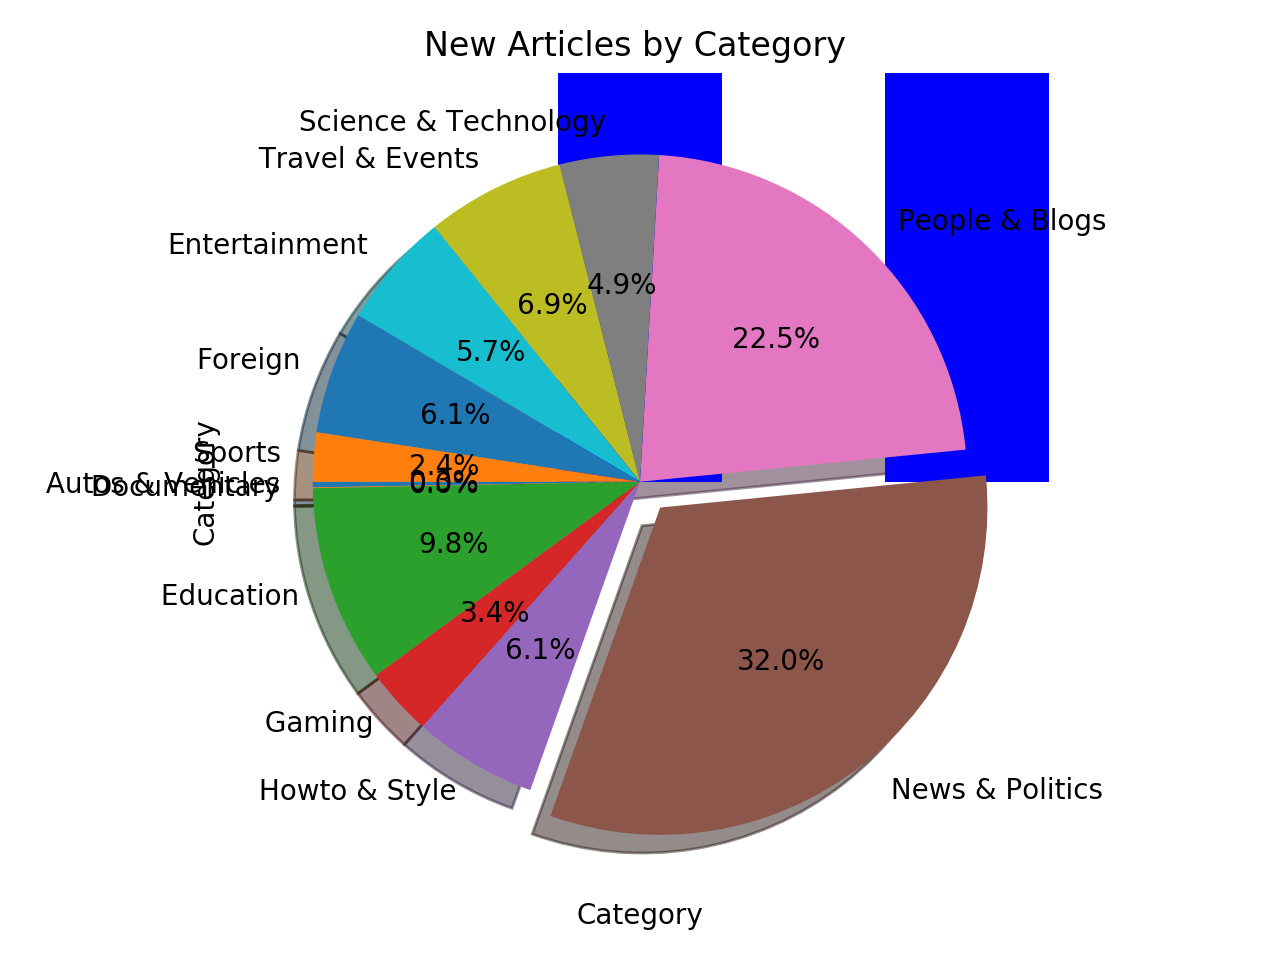

In [58]:
article_chart =count_articles.plot(kind='bar',color='b')

yt_chart.set_xlabel("Category")
yt_chart.set_ylabel("Number of News Articles")
plt.title('Articles by Category ')

plt.show()
plt.tight_layout()


#plt.savefig('Articlebar.png')

<IPython.core.display.Javascript object>


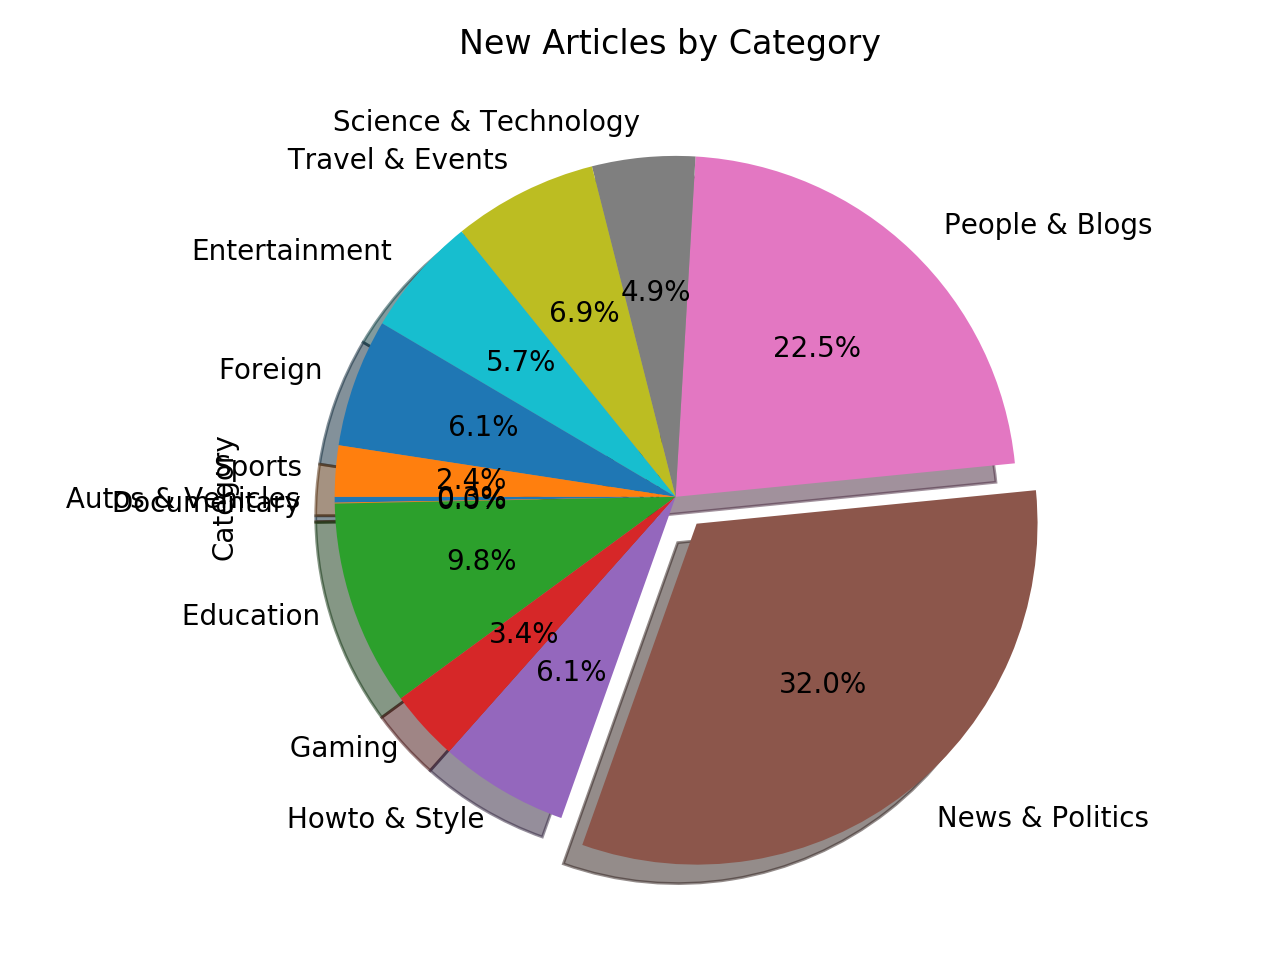

In [62]:
explode = (0,0,0,0,0,0.1,0,0,0,0,0,0)
articles_pie= count_articles.plot(kind='pie', explode=explode,autopct="%1.1f%%", shadow=True, startangle=180)


plt.title('New Articles by Category ')
plt.show()
plt.tight_layout()

plt.savefig('Articlepie.png')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

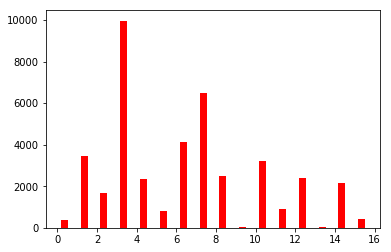

In [57]:
index = np.arange(16)
opacity = 0.8
bar_width = 0.35


fig, ax = plt.subplots()
plt.bar(index+bar_width, count_yt, bar_width, color='r', label='Youtube')

#plt.bar(index+bar_width, count_articles, bar_width,color='b', label="New Articles")

plt.xlabel('Category')
plt.ylabel('Count (Video/Article)')
plt.title('Youtube and News Article Categories')
plt.xticks(index + bar_width / 2,('Autos & Vehicles','Comedy',' Education',
           ' Entertainment','Film & Animation','Gaming','Howto & Style','Music',
           'News & Politics','Nonprofits & Activism','People & Blogs','Pets & Animals',
           'Science & Technology','Shows','Sports','Travel & Events'))
plt.legend()

#plt.tight_layout()
plt.show()



In [12]:
merge_df = pd.merge(youtube_df, articles_df, on='Category', suffixes=('_youtube', '_ny_times'))
merge_df.head()

,Category_ID,Category,Date_youtube,Video_Title,Channel,Tags,Total_Views,Total_Likes,Comments_Count,Article_ID,Headline,Keywords,Date_ny_times,Section_Name,Snippet,Media_Type,URL
0,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954,5a70eb8110f40f00018be925,Here’s the Real State of the Union,"['State of the Union Message (US)', 'Trump, Do...",1/30/2018 22:02,Editorials,The reaction against his authoritarian impulse...,Editorial,https://www.nytimes.com/2018/01/30/opinion/edi...
1,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954,5a70d1d210f40f00018be8d9,Good Riddance to Chief Wahoo,"['Baseball', 'Cleveland Indians', 'Western Res...",1/30/2018 20:13,Unknown,"I’ve lived in Cleveland all my life, and I’m g...",Op-Ed,https://www.nytimes.com/2018/01/30/opinion/chi...
2,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954,5a70c57b10f40f00018be8ac,How Trump’s Critics Should Respond,"['United States Politics and Government', 'Sta...",1/30/2018 19:20,Unknown,The normalcy of a State of the Union address s...,Op-Ed,https://www.nytimes.com/2018/01/30/opinion/tru...
3,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954,5a704e5a10f40f00018be726,Unknown,"['Terrorism', 'Politics and Government', 'Civi...",1/30/2018 10:52,The Daily,After the U.S. government said it would cut mi...,briefing,https://www.nytimes.com/2018/01/30/podcasts/th...
4,22,People & Blogs,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,SHANtell martin,748374,57527,15954,5a704cbc10f40f00018be721,The Latest Data Privacy Debacle,"['Data Storage', 'Privacy', 'Mobile Applicatio...",1/30/2018 10:45,Unknown,"The saga of Strava, an app that inadvertently ...",Op-Ed,https://www.nytimes.com/2018/01/30/opinion/str...


In [ ]:
article_chart =count_articles.plot(kind='bar',color='b')

yt_chart.set_xlabel("Category")
yt_chart.set_ylabel("Number of News Articles")
plt.title('Articles by Category ')

plt.show()
plt.tight_layout()


savefig('Resources/Articlebar.png')

<h3>Upload Merged DataFrame to MongoDB</h3>

In [ ]:
# connecting to mongo database
conn = 'mongodb://localhost:27017/Social_Media_DB'
client = pymongo.MongoClient(conn)
db = client.socialmedia_db
socialmedia = db.socialmedia.find()
client.db.socialmedia.insert_many(merge_df.to_dict(orient = 'records'))

<h3>Visualizations</h3>

In [ ]:
# Look at the cateories
yt_group = youtube_df.groupby('Category')
count_yt= yt_group['Category'].count()
count_yt

In [ ]:
# Create Bar Chart
count_chart = count_yt.plot(kind='bar')
plt.show()
plt.tight_layout()